In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

In [3]:
df = pd.read_csv('/Users/haileytrier/Downloads/Trier_et_al_2023_code/data/ROI_stats_all_participants.csv')
df.head()

,ParticipantID,ROI,Cope number,Phase,Action,Regressor,Value
0,sub103,DRN,1,post,firstCheck,Constant,0.2298
1,sub103,DRN,2,post,firstCheck,TimeSinceLastCheck,0.3826
2,sub103,DRN,3,post,firstCheck,Proximity,0.2873
3,sub103,DRN,4,post,firstCheck,Reward,0.8362
4,sub103,DRN,5,post,firstForage,Constant,0.3000


In [32]:
# Extract PAG effect for time pressure during threat detection 
pag_pre_threat = df.loc[
    (df['ROI']=='PAG') &
    (df['Regressor']=='TimePressure') &
    (df['Action']=='firstCheck') &
    (df['Phase']=='pre')
]
pag_pre_switchToCheck = df.loc[
    (df['ROI']=='PAG') &
    (df['Regressor']=='Constant') &
    (df['Action']=='firstCheck') &
    (df['Phase']=='pre')
]
pag_post_threat = df.loc[
    (df['ROI']=='PAG') &
    (df['Regressor']=='Proximity') &
    (df['Action']=='firstCheck') &
    (df['Phase']=='post')
]
pag_post_switchToCheck = df.loc[
    (df['ROI']=='PAG') &
    (df['Regressor']=='Constant') &
    (df['Action']=='firstCheck') &
    (df['Phase']=='post')
]

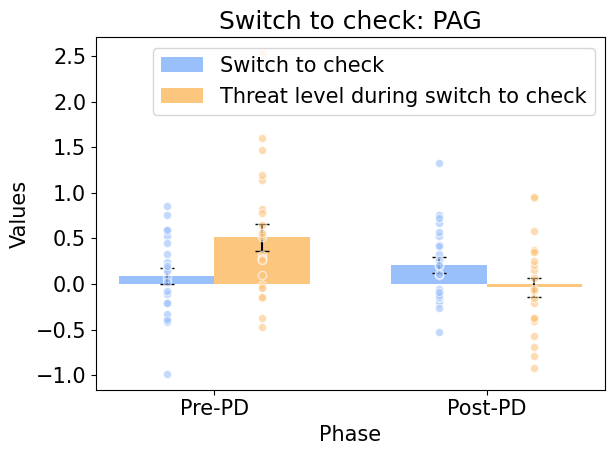

In [58]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

# Sample data (replace with your np.arrays)
phase1_regressor1 = pag_pre_switchToCheck.Value.values
phase1_regressor2 = pag_pre_threat.Value.values
phase2_regressor1 = pag_post_switchToCheck.Value.values
phase2_regressor2 = pag_post_threat.Value.values

# Data structure
phases = ['Pre-PD', 'Post-PD']
regressors = ['Switch to check', 'Threat level during switch to check']

# Organizing the data for easy plotting (mean and standard error of the mean)
data_means = {
    'Pre-PD': [np.mean(phase1_regressor1), np.mean(phase1_regressor2)],
    'Post-PD': [np.mean(phase2_regressor1), np.mean(phase2_regressor2)],
}

# Standard error of the mean (SEM) calculation
data_sem = {
    'Pre-PD': [sem(phase1_regressor1),
                sem(phase1_regressor2)],
    'Post-PD': [sem(phase2_regressor1),
                sem(phase2_regressor2)],
}

# Number of phases and regressors
n_phases = len(phases)
n_regressors = len(regressors)

# Set up the figure and axis
fig, ax = plt.subplots()

# Bar width and x locations
bar_width = 0.35
x = np.arange(n_phases)

# Colors for the regressors
colors = ['#9ac0fc', '#fcc67e']

# Plot bars for each regressor with error bars
for i, regressor in enumerate(regressors):
    ax.bar(x + i * bar_width, 
           [data_means[phase][i] for phase in phases], 
           yerr=[data_sem[phase][i] for phase in phases],  # Error bars
           width=bar_width, 
           label=regressor,
           color=colors[i],
           capsize=5)

    # Plot individual data points as semi-transparent dots over each bar
    for j, phase in enumerate(phases):
        if i == 0:
            phase_data = phase1_regressor1 if phase == 'Pre-PD' else phase2_regressor1
        else:
            phase_data = phase1_regressor2 if phase == 'Pre-PD' else phase2_regressor2
        # Scatter plot for individual data points with slight jitter
        ax.scatter(np.full_like(phase_data, x[j] + i * bar_width), phase_data, 
                   color=colors[i], alpha=0.6, edgecolor='white', zorder=3)


# Add labels, title, and custom ticks
ax.set_xlabel('Phase')
ax.set_ylabel('Values')
ax.set_title('Switch to check: PAG')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(phases)
ax.legend()

# Display the plot
plt.tight_layout()
plt.savefig('/Users/haileytrier/Downloads/Trier_et_al_2023_code/Supplementary_analyses_Sep2024/PAG_Analysis/PAG_regressors.pdf', format='pdf')
plt.show()
